In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from fbprophet import Prophet
#import altair as alt
import glob
from scipy import stats

#alt.renderers.enable('notebook')
pd.options.mode.chained_assignment = None  # default='warn'
features_in = "features/features_sub_noout.csv"

In [2]:
def map_color_r(is_card):
    if(is_card): return "r"
    return "b"

def map_color_l(is_card):
    if(is_card): return "y"
    return "g"

In [3]:
column_names = [
        'subject','duration',
        #'card_class','show_order',
        'fix_freq','sacc_freq',
        'pupil_diam_right_mean','pupil_diam_right_std','pupil_diam_right_min','pupil_diam_right_max',
        'pupil_diam_left_mean','pupil_diam_left_std','pupil_diam_left_min','pupil_diam_left_max',
        'sre_fix_freq','sre_sacc_freq',
        'sre_pupil_diam_right_mean','sre_pupil_diam_right_std',
        'sre_pupil_diam_right_min','sre_pupil_diam_right_max',
        'sre_pupil_diam_left_mean','sre_pupil_diam_left_std',
        'sre_pupil_diam_left_min','sre_pupil_diam_left_max',
        'srl_fix_freq','srl_sacc_freq',
        'srl_pupil_diam_right_mean','srl_pupil_diam_right_std',
        'srl_pupil_diam_right_min','srl_pupil_diam_right_max',
        'srl_pupil_diam_left_mean','srl_pupil_diam_left_std',
        'srl_pupil_diam_left_min','srl_pupil_diam_left_max',
        'label'
    ]
    
features = pd.read_csv(features_in, sep='\t')
features = features.fillna(0)
subjects = features[['subject']].groupby('subject').count().index.values
subjects

array([ 4,  5,  7,  8, 10, 11, 13, 14, 15, 18, 21, 22, 25])

In [4]:
def plotSubjectFeaures(features, sub):
    data = features.loc[features['subject'] == sub]
    data

    colors = data['label'].values
    colors_r = list(map(map_color_r, colors))
    colors_l = list(map(map_color_l, colors))

    cards = data['card_class'].values
    diam_r = data['pupil_diam_right_mean'].values
    diam_l = data['pupil_diam_left_mean'].values
    sacc = data['sacc_freq'].values
    fix = data['fix_freq'].values
    dur = data['duration'].values

    errors = data['pupil_diam_right_std'].values

    fig, ass = plt.subplots(5,1, figsize=[15, 20])
    ass[0].set_title("Right Dilation")
    ass[1].set_title("Left Dilation")
    ass[2].set_title("Saccades Freq")
    ass[3].set_title("Fixation Freq")
    ass[4].set_title("Duration")

    size = 100

    ass[0].scatter(cards, diam_r, color=colors_r, s=size)
    ass[1].scatter(cards, diam_l, color=colors_r, s=size)
    ass[2].scatter(cards, sacc, color=colors_r, s=size)
    ass[3].scatter(cards, fix, color=colors_r, s=size)
    ass[4].scatter(cards, dur, color=colors_r, s=size)
    #ass.errorbar(cards, y, yerr=errors)

    plt.show()

In [5]:
def bigAggregation(features, sub, cols, aggrDF):
    data = features[cols].loc[features['subject'] == sub]
    zeros = data.loc[features['label'] == 0]
    ones = data.loc[features['label'] == 1]

    for col in zeros.columns:
        zeros[col] = zeros[col].mean()
    zeros = zeros.head(1)
    
    aggrDF = aggrDF.append(ones, ignore_index=True)
    aggrDF = aggrDF.append(zeros, ignore_index=True)
    return aggrDF


features = features.loc[~features["subject"].isin([10])]
subjects = features[['subject']].groupby('subject').count().index.values
aDF = pd.DataFrame(columns=column_names)
for sub in subjects:
    aDF = bigAggregation(features, sub, column_names, aggrDF=aDF)
    
zeros = aDF.loc[aDF['label'] == 0]
ones = aDF.loc[aDF['label'] == 1]

subjects

array([ 4,  5,  7,  8, 11, 13, 14, 15, 18, 21, 22, 25])

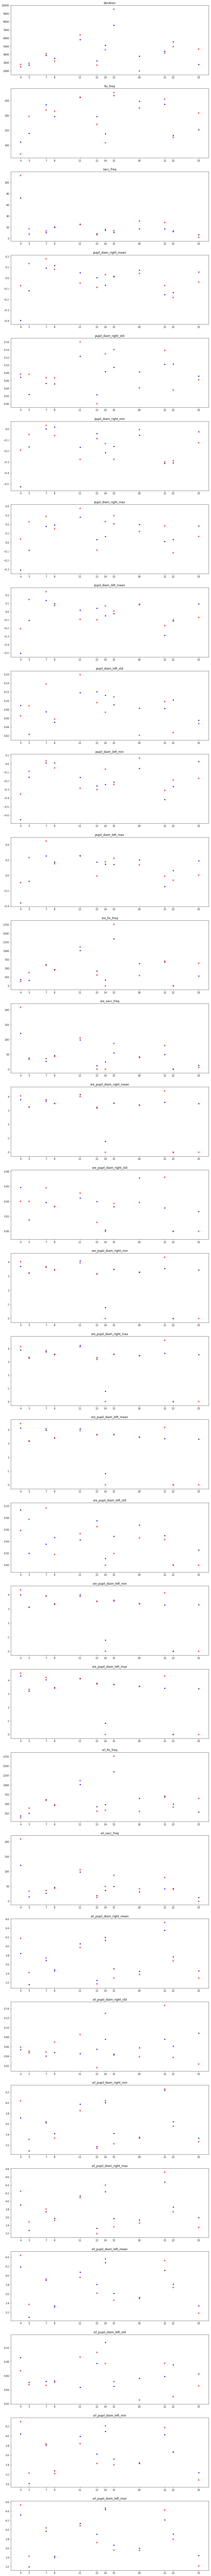

In [6]:
col_grid = [
        'duration',
        'fix_freq',
        'sacc_freq',
    
        'pupil_diam_right_mean',
        'pupil_diam_right_std',
        'pupil_diam_right_min',
        'pupil_diam_right_max',
        'pupil_diam_left_mean',
        'pupil_diam_left_std',
        'pupil_diam_left_min',
        'pupil_diam_left_max',
    
        'sre_fix_freq',
        'sre_sacc_freq',
        'sre_pupil_diam_right_mean',
        'sre_pupil_diam_right_std',
        'sre_pupil_diam_right_min',
        'sre_pupil_diam_right_max',
        'sre_pupil_diam_left_mean',
        'sre_pupil_diam_left_std',
        'sre_pupil_diam_left_min',
        'sre_pupil_diam_left_max',
    
        'srl_fix_freq',
        'srl_sacc_freq',
        'srl_pupil_diam_right_mean',
        'srl_pupil_diam_right_std',
        'srl_pupil_diam_right_min',
        'srl_pupil_diam_right_max',
        'srl_pupil_diam_left_mean',
        'srl_pupil_diam_left_std',
        'srl_pupil_diam_left_min',
        'srl_pupil_diam_left_max'
    ]

zeros = aDF.loc[aDF['label'] == 0]
ones = aDF.loc[aDF['label'] == 1]

fig, axs = plt.subplots(31, figsize=(15, 200))

for c, col in enumerate(col_grid):
    axs[c].set_title("{}".format(col))
    axs[c].set_xticks([4, 5, 7, 8, 11, 13, 14, 15, 18, 21, 22, 25])
    axs[c].scatter(zeros["subject"], zeros[col], s=60, c="b", marker=".")
    axs[c].scatter(ones["subject"], ones[col], s=60, c="r", marker="+")
                                      
plt.show()
                                          

In [15]:
#zeros = features.loc[features['label'] == 0]
#ones = features.loc[features['label'] == 1]

ttest = []
for col in column_names:
    #print(col)
    t, p = stats.ttest_ind(zeros[col].values,ones[col].values)
    tt = (col, t, p)
    ttest.append(tt)
    
for tt in ttest:
    print(tt)


('subject', 0.0, 1.0)
('duration', -0.12551580973231202, 0.9012551563665205)
('fix_freq', -0.057066369654445545, 0.9550074641491084)
('sacc_freq', -0.6359676538233182, 0.5313584741248587)
('pupil_diam_right_mean', -0.7505417285107254, 0.4608811622538228)
('pupil_diam_right_std', -0.5639457497641808, 0.5784952897634448)
('pupil_diam_right_min', -0.2897487794345112, 0.7747216903460724)
('pupil_diam_right_max', -1.025973711797788, 0.3160533067046881)
('pupil_diam_left_mean', -0.5967010123885823, 0.5567982442002025)
('pupil_diam_left_std', 0.11814107209491607, 0.9070279211049934)
('pupil_diam_left_min', -0.49620515413515076, 0.6246709829784818)
('pupil_diam_left_max', -0.5115432521885472, 0.6140670325823957)
('sre_fix_freq', -0.19178688536871685, 0.8496682865722908)
('sre_sacc_freq', -0.4794326396830513, 0.6363624293382781)
('sre_pupil_diam_right_mean', 0.44676295099822627, 0.6594132343482534)
('sre_pupil_diam_right_std', 0.09856629204063494, 0.9223752125787591)
('sre_pupil_diam_right_min'